In the first step we need to create our benchmark portfolios, basically an equal weighting portfolio and a portfolio based on historical averages and compute their return.

In [978]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [979]:
# import cum_returns data from ML_forecasting_v2_Haas.ipynb
%store -r cum_returns

In [980]:
cum_returns.tail()

component,STOXX Europe 600,STOXX Europe Banks,STOXX Europe Financials,STOXX Europe Auto & Parts,STOXX Europe Insurance,STOXX Europe Technology,STOXX Europe Utilities,STOXX Europe Chemicals,STOXX Europe Basic Resource,STOXX Europe Con & Mat,STOXX Europe Health Care,STOXX Europe Inds Gds & Svs,STOXX Europe Media,STOXX Europe Telecoms
time,,,,,,,,,,,,,,
1987-02-01,0.003262,-0.014862,-0.021088,-0.105098,-0.043612,-0.053721,-0.001662,-0.008218,0.008885,0.080812,0.106993,0.019787,0.087577,0.002062
1987-03-01,0.041808,-0.045937,-0.035794,-0.130801,-0.045244,-0.033286,0.023871,0.041092,0.046786,0.158261,0.263403,0.115137,0.164801,0.071586
1987-04-01,0.071290,-0.035032,-0.015353,-0.089087,-0.019675,0.027842,0.025835,0.083342,0.114258,0.173871,0.236597,0.119589,0.195719,0.061128
1987-05-01,0.101257,-0.044489,-0.012579,-0.071029,-0.016230,0.059700,0.033691,0.085028,0.188116,0.225144,0.265967,0.156691,0.215165,0.189719
1987-06-01,0.122523,-0.062536,-0.034221,-0.086378,-0.053677,0.045868,0.058015,0.124328,0.225462,0.264049,0.324009,0.188350,0.249860,0.233171


# Benchmark Portfolios

Our main benchmark is the STOXX Europe 600 Index. Furthermore, we expand the benchmarks by computing the equal weighted portfolio and portfolio based on historical averages.

## Equal Weighted Portfolio

In [981]:
# create a list of the column names
col_list = list(cum_returns.columns)[1:]

In [982]:
# create weights
weights_ew = 1/len(col_list)

In [983]:
# print single weight and the sum of all weights
print('The weight for each stock is: ' + str(weights_ew))
print('The sum of all weights is: ' + str(weights_ew * 13))

The weight for each stock is: 0.07692307692307693
The sum of all weights is: 1.0


In [984]:
# create a new column in cum_returns for the equal weighted portfolio
cum_returns['equal_weighted'] = cum_returns[col_list].mul(weights_ew).sum(axis=1)
cum_returns.tail()

component,STOXX Europe 600,STOXX Europe Banks,STOXX Europe Financials,STOXX Europe Auto & Parts,STOXX Europe Insurance,STOXX Europe Technology,STOXX Europe Utilities,STOXX Europe Chemicals,STOXX Europe Basic Resource,STOXX Europe Con & Mat,STOXX Europe Health Care,STOXX Europe Inds Gds & Svs,STOXX Europe Media,STOXX Europe Telecoms,equal_weighted
time,,,,,,,,,,,,,,,
2021-09-01,4.716808,0.323152,1.020523,2.763673,1.807825,6.282108,4.996132,12.830850,7.241788,6.581232,23.264545,8.645239,4.049734,2.539387,6.334322
2021-10-01,4.472414,0.349498,0.996245,2.793493,1.753568,5.618892,4.490648,12.154978,6.504470,5.982721,21.991305,8.123151,3.913360,2.372352,5.926514
2021-11-01,4.786189,0.453571,1.144580,3.084807,1.908505,6.202213,4.935700,12.867654,6.839192,6.419909,23.637809,8.430423,3.988011,2.285756,6.322933
2021-12-01,4.689488,0.348523,1.040048,2.952694,1.816846,6.247403,4.884091,12.766200,6.914258,6.342555,23.011935,8.408100,4.033422,2.316497,6.237121
2022-01-01,4.920590,0.412739,1.126082,3.064630,1.947792,6.192709,5.161656,13.416289,7.346731,6.769320,24.096923,8.930114,4.207583,2.404551,6.544394


In [985]:
# create a new variable called portfolio_returns with same structure as cum_returns
portfolio_returns = cum_returns.copy()
# delete all columns except for the equal_weighted column
portfolio_returns.drop(cum_returns.columns.difference(['equal_weighted']), 1, inplace=True)
portfolio_returns.tail()

/var/folders/jr/jvqd5mmj25sg1lj_gtw12nm00000gn/T/ipykernel_95897/1339975479.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  portfolio_returns.drop(cum_returns.columns.difference(['equal_weighted']), 1, inplace=True)


component,equal_weighted
time,
2021-09-01,6.334322
2021-10-01,5.926514
2021-11-01,6.322933
2021-12-01,6.237121
2022-01-01,6.544394


In [986]:
# delete equal weighted column from cum_returns
cum_returns.drop('equal_weighted', axis=1, inplace=True)

## Portfolio based on Historical Average

In [987]:
# Calculate average daily returns for each stock and exlude the first column
avg_returns = cum_returns.mean()[1:]

# Calculate weights based on average daily returns
weights_ha = avg_returns / avg_returns.sum()

# Calculate portfolio returns
ha_returns = (cum_returns * weights_ha).sum(axis=1)

# Add portfolio_returns as a new column in cum_returns
portfolio_returns['historical_average'] = ha_returns

# show the last 5 rows of portfolio_returns of historical average portfolio
portfolio_returns.tail()

component,equal_weighted,historical_average
time,,
2021-09-01,6.334322,10.565259
2021-10-01,5.926514,9.912039
2021-11-01,6.322933,10.583310
2021-12-01,6.237121,10.402550
2022-01-01,6.544394,10.913366


In [988]:
avg_returns

component
STOXX Europe Banks             1.062932
STOXX Europe Financials        0.987653
STOXX Europe Auto & Parts      0.702626
STOXX Europe Insurance         0.893093
STOXX Europe Technology        1.634406
STOXX Europe Utilities         2.763100
STOXX Europe Chemicals         3.495400
STOXX Europe Basic Resource    3.203787
STOXX Europe Con & Mat         1.987670
STOXX Europe Health Care       8.323560
STOXX Europe Inds Gds & Svs    2.477718
STOXX Europe Media             2.030860
STOXX Europe Telecoms          2.624212
dtype: float64

In [989]:
# print single weight and the sum of all weights for historical average portfolio
print('The weight for each stock is: ' + str(weights_ha))
print('The sum of all weights is: ' + str(weights_ha.sum()))

The weight for each stock is: component
STOXX Europe Banks             0.033024
STOXX Europe Financials        0.030685
STOXX Europe Auto & Parts      0.021829
STOXX Europe Insurance         0.027747
STOXX Europe Technology        0.050778
STOXX Europe Utilities         0.085845
STOXX Europe Chemicals         0.108597
STOXX Europe Basic Resource    0.099537
STOXX Europe Con & Mat         0.061754
STOXX Europe Health Care       0.258600
STOXX Europe Inds Gds & Svs    0.076979
STOXX Europe Media             0.063096
STOXX Europe Telecoms          0.081530
dtype: float64
The sum of all weights is: 1.0


## Plotting of EW and HA against benchmark

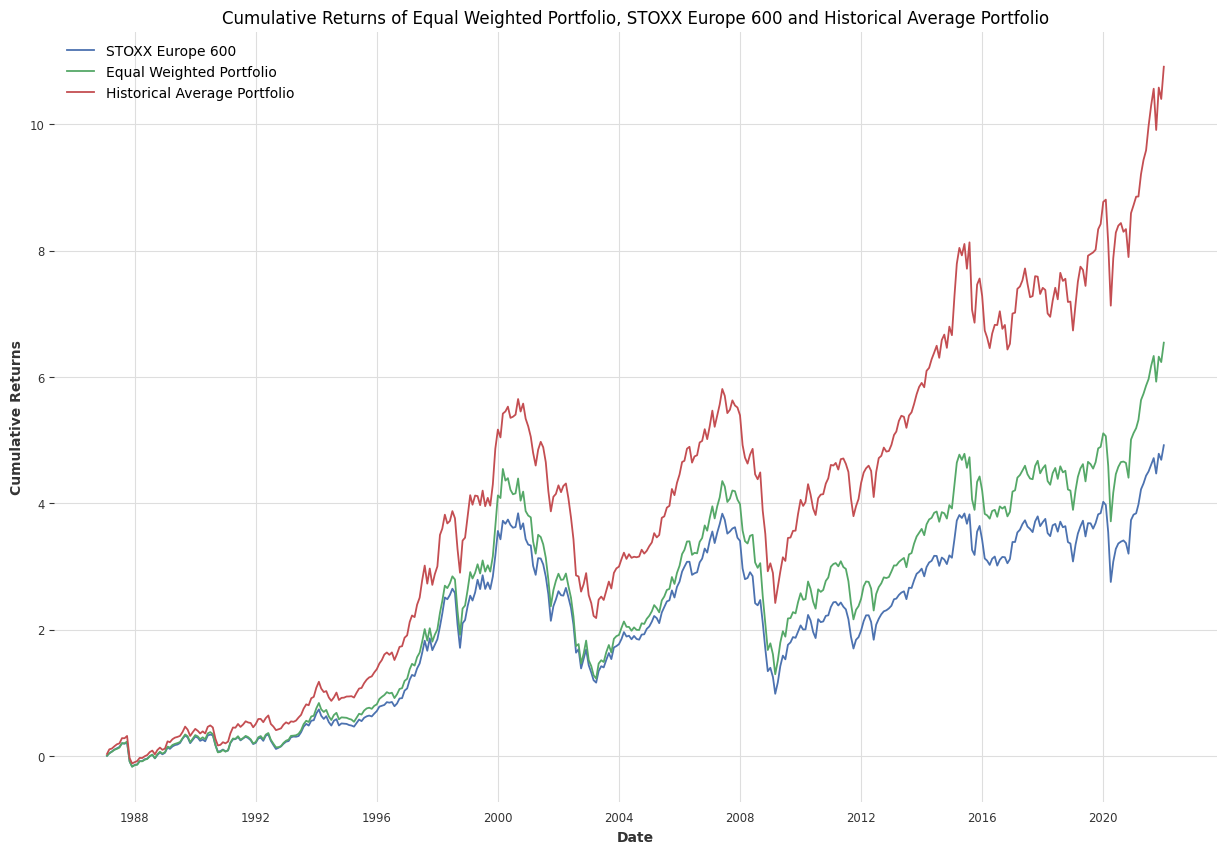

In [990]:
# plot the cumulative returns of the equal weighted portfolio, the STOXX Europe 600 and the historical average portfolio
plt.figure(figsize=(15,10))
plt.plot(cum_returns['STOXX Europe 600'], label='STOXX Europe 600')
plt.plot(portfolio_returns['equal_weighted'], label='Equal Weighted Portfolio')
plt.plot(portfolio_returns['historical_average'], label='Historical Average Portfolio')
plt.legend(loc='upper left')
plt.title('Cumulative Returns of Equal Weighted Portfolio, STOXX Europe 600 and Historical Average Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show();

In [991]:
# show only the last value of equal weighted portfolio, STOXX Europe 600 and historical average portfolio
print('The last value of the equal weighted portfolio is: ' + str(round(portfolio_returns.iloc[-1,0], 4)))
print('The last value of the STOXX Europe 600 is: ' + str(round(cum_returns.iloc[-1,0], 4)))
print('The last value of the historical average portfolio is: ' + str(round(portfolio_returns.iloc[-1,1], 4)))

The last value of the equal weighted portfolio is: 6.5444
The last value of the STOXX Europe 600 is: 4.9206
The last value of the historical average portfolio is: 10.9134


# Shrinkage Portfolios

In [992]:
# import relevant packages from PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Linear Regression Portfolio

In [993]:
# get the linear regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r linear_forecast

In [994]:
# change the type of the linear_forecast to a pandas dataframe
linear_forecast = linear_forecast.pd_dataframe()

In [995]:
#linear_forecast.tail()

In [996]:
# perform mean-variance optimization with the linear regression forecast
mu_linear_regression = expected_returns.mean_historical_return(linear_forecast)
S_linear_regression = risk_models.sample_cov(linear_forecast)

In [997]:
# optimize for maximal Sharpe ratio
ef_linear_regression = EfficientFrontier(mu_linear_regression, S_linear_regression)
weights_lr = ef_linear_regression.max_sharpe()

In [998]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_lr).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_lr.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.0000
STOXX Europe Banks             0.0317
STOXX Europe Financials        0.0000
STOXX Europe Auto & Parts      0.1820
STOXX Europe Insurance        -0.0000
STOXX Europe Technology        0.0298
STOXX Europe Utilities         0.0000
STOXX Europe Chemicals        -0.0000
STOXX Europe Basic Resource    0.0000
STOXX Europe Con & Mat         0.1116
STOXX Europe Health Care       0.6449
STOXX Europe Inds Gds & Svs   -0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms          0.0000
dtype: float64
The sum of all weights is: 1.0


In [999]:
lr_returns = (cum_returns * weights_lr).sum(axis=1)

In [1000]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['linear_regression'] = lr_returns

# show the last 5 rows of portfolio_returns of historical average portfolio
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression
time,,,
2021-09-01,6.334322,10.565259,16.437174
2021-10-01,5.926514,9.912039,15.535828
2021-11-01,6.322933,10.583310,16.720072
2021-12-01,6.237121,10.402550,16.281803
2022-01-01,6.544394,10.913366,17.049893


## NOT WORKING: Ridge Regression Portfolio

In [1001]:
# get the ridge regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r ridge_forecast

In [1002]:
# change the type of the ridge_forecast to a pandas dataframe
ridge_forecast = ridge_forecast.pd_dataframe()

In [1003]:
# get shape of ridge_forecast
#ridge_forecast.shape

In [1004]:
#ridge_forecast.tail()

In [1005]:
# perform mean-variance optimization with the ridge regression forecast
mu_ridge_regression = expected_returns.mean_historical_return(ridge_forecast)
S_ridge_regression = risk_models.sample_cov(ridge_forecast)

In [1006]:
# get shape of mu_ridge_regression and S_ridge_regression
#print(mu_ridge_regression.shape)
#print(S_ridge_regression.shape)

In [1007]:
"""
ISSUE!!!!
"""
# optimize for maximal Sharpe ratio
#ef_ridge_regression = EfficientFrontier(mu_ridge_regression, S_ridge_regression)
#weights_rr = ef_ridge_regression.max_sharpe()

'\nISSUE!!!!\n'

## Lasso Regression Portfolio

In [1008]:
# get the lasso regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r lasso_forecast

In [1009]:
# change the type of the lasso_forecast to a pandas dataframe
lasso_forecast = lasso_forecast.pd_dataframe()

In [1010]:
#lasso_forecast.tail()

In [1011]:
# perform mean-variance optimization with the lasso regression forecast
mu_lasso_regression = expected_returns.mean_historical_return(lasso_forecast)
S_lasso_regression = risk_models.sample_cov(lasso_forecast)

In [1012]:
# optimize for maximal Sharpe ratio
ef_lasso_regression = EfficientFrontier(mu_lasso_regression, S_lasso_regression)
weights_lar = ef_lasso_regression.max_sharpe()

In [1013]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_lar).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_lar.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.0000
STOXX Europe Banks             0.0000
STOXX Europe Financials        0.0000
STOXX Europe Auto & Parts      0.0000
STOXX Europe Insurance         0.0000
STOXX Europe Technology        0.0229
STOXX Europe Utilities         0.0000
STOXX Europe Chemicals         0.0000
STOXX Europe Basic Resource    0.1079
STOXX Europe Con & Mat         0.0000
STOXX Europe Health Care       0.8693
STOXX Europe Inds Gds & Svs    0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms          0.0000
dtype: float64
The sum of all weights is: 1.0


In [1014]:
# compute the returns of lasso regression portfolio
lar_returns = (cum_returns * weights_lar).sum(axis=1)

In [1015]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['lasso_regression'] = lar_returns

# show the last 5 rows of portfolio_returns of historical average portfolio
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression
time,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879
2021-10-01,5.926514,9.912039,15.535828,19.946396
2021-11-01,6.322933,10.583310,16.720072,21.427089
2021-12-01,6.237121,10.402550,16.281803,20.892168
2022-01-01,6.544394,10.913366,17.049893,21.880713


## Elastic Net Portfolio

In [1016]:
# get the elastic net regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r elastic_net_forecast

In [1017]:
# change the type of the elastic_net_forecast to a pandas dataframe
elastic_net_forecast = elastic_net_forecast.pd_dataframe()

In [1018]:
# perform mean-variance optimization with the elastic net regression forecast
mu_elastic_net_regression = expected_returns.mean_historical_return(elastic_net_forecast)
S_elastic_net_regression = risk_models.sample_cov(elastic_net_forecast)

In [1019]:
# optimize for maximal Sharpe ratio
ef_elastic_net_regression = EfficientFrontier(mu_elastic_net_regression, S_elastic_net_regression)
weights_enr = ef_elastic_net_regression.max_sharpe()

In [1020]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_enr).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_enr.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.0000
STOXX Europe Banks             0.0000
STOXX Europe Financials        0.0000
STOXX Europe Auto & Parts      0.0000
STOXX Europe Insurance         0.0000
STOXX Europe Technology        0.0229
STOXX Europe Utilities         0.0000
STOXX Europe Chemicals         0.0000
STOXX Europe Basic Resource    0.1079
STOXX Europe Con & Mat         0.0000
STOXX Europe Health Care       0.8693
STOXX Europe Inds Gds & Svs    0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms          0.0000
dtype: float64
The sum of all weights is: 1.0


In [1021]:
# compute the returns of elastic net regression portfolio
enr_returns = (cum_returns * weights_enr).sum(axis=1)

In [1022]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['elastic_net_regression'] = enr_returns

# show the last 5 rows of portfolio_returns
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression,elastic_net_regression
time,,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879,21.147879
2021-10-01,5.926514,9.912039,15.535828,19.946396,19.946396
2021-11-01,6.322933,10.583310,16.720072,21.427089,21.427089
2021-12-01,6.237121,10.402550,16.281803,20.892168,20.892168
2022-01-01,6.544394,10.913366,17.049893,21.880713,21.880713


## Bridge Regression Portfolio

In [1023]:
# get the bridge regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r bridge_forecast

In [1024]:
# change the type of the bridge_forecast to a pandas dataframe
bridge_forecast = bridge_forecast.pd_dataframe()

In [1025]:
# perform mean-variance optimization with the bridge regression forecast
mu_bridge_regression = expected_returns.mean_historical_return(bridge_forecast)
S_bridge_regression = risk_models.sample_cov(bridge_forecast)

In [1026]:
# optimize for maximal Sharpe ratio
ef_bridge_regression = EfficientFrontier(mu_bridge_regression, S_bridge_regression)
weights_br = ef_bridge_regression.max_sharpe()

In [1027]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_br).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_br.values()), 4)))

The weights for each stock are:
STOXX Europe 600              -0.0000
STOXX Europe Banks            -0.0000
STOXX Europe Financials       -0.0000
STOXX Europe Auto & Parts     -0.0000
STOXX Europe Insurance         0.1113
STOXX Europe Technology       -0.0000
STOXX Europe Utilities        -0.0000
STOXX Europe Chemicals        -0.0000
STOXX Europe Basic Resource   -0.0000
STOXX Europe Con & Mat        -0.0000
STOXX Europe Health Care       0.8887
STOXX Europe Inds Gds & Svs   -0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms         -0.0000
dtype: float64
The sum of all weights is: 1.0


In [1028]:
# compute the returns of bridge regression portfolio
br_returns = (cum_returns * weights_br).sum(axis=1)

In [1029]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['bridge_regression'] = br_returns

# show the last 5 rows of portfolio_returns
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression,elastic_net_regression,bridge_regression
time,,,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879,21.147879,20.875656
2021-10-01,5.926514,9.912039,15.535828,19.946396,19.946396,19.738131
2021-11-01,6.322933,10.583310,16.720072,21.427089,21.427089,21.218571
2021-12-01,6.237121,10.402550,16.281803,20.892168,20.892168,20.652174
2022-01-01,6.544394,10.913366,17.049893,21.880713,21.880713,21.630943


## Plotting of all portfolios against Benchmark, EW and HA

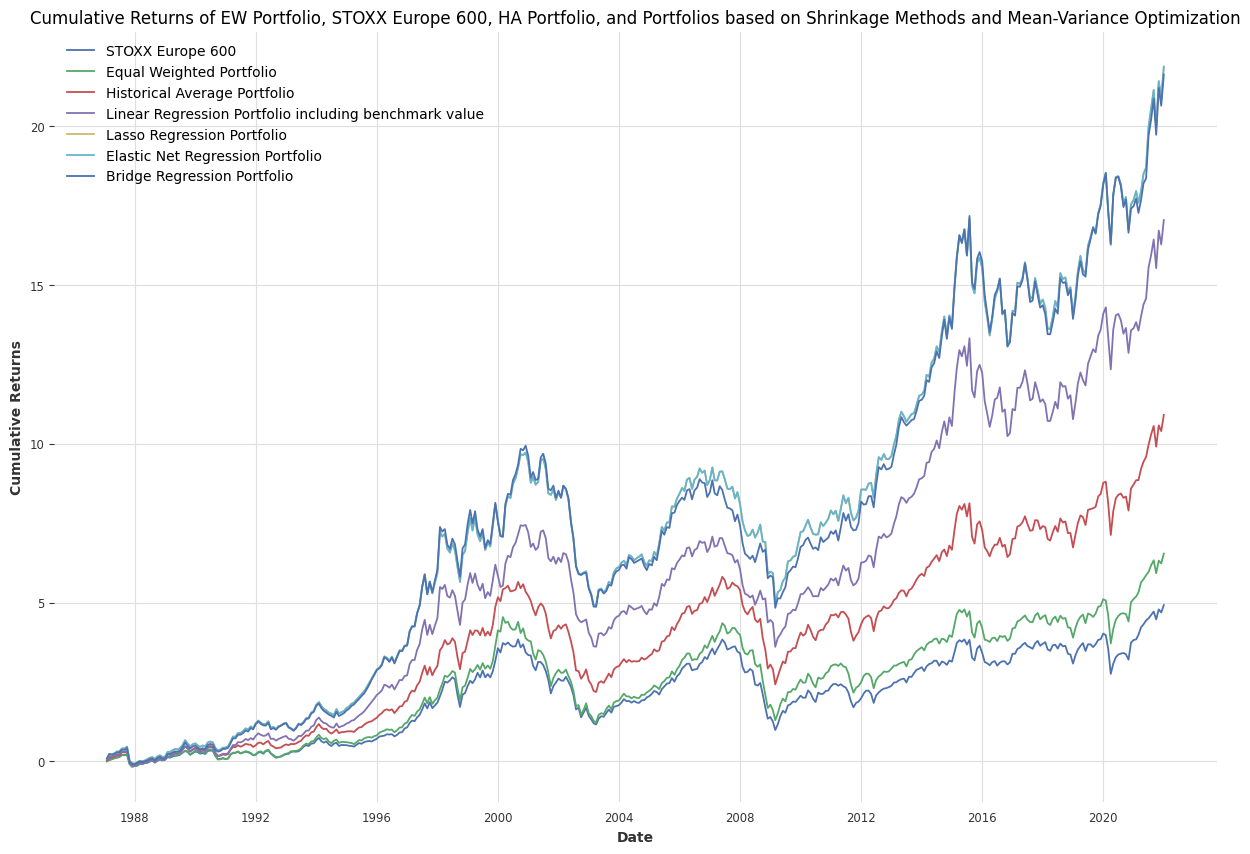

In [1030]:
# plot the cumulative returns of the equal weighted portfolio, the STOXX Europe 600, the historical average portfolio, the linear regression portfolio, the lasso regression portfolio, the elastic net regression portfolio and the bridge regression portfolio
plt.figure(figsize=(15,10))
plt.plot(cum_returns['STOXX Europe 600'], label='STOXX Europe 600')
plt.plot(portfolio_returns['equal_weighted'], label='Equal Weighted Portfolio')
plt.plot(portfolio_returns['historical_average'], label='Historical Average Portfolio')
plt.plot(portfolio_returns['linear_regression'], label='Linear Regression Portfolio including benchmark value')
plt.plot(portfolio_returns['lasso_regression'], label='Lasso Regression Portfolio')
plt.plot(portfolio_returns['elastic_net_regression'], label='Elastic Net Regression Portfolio')
plt.plot(portfolio_returns['bridge_regression'], label='Bridge Regression Portfolio')
plt.legend(loc='upper left')
plt.title('Cumulative Returns of EW Portfolio, STOXX Europe 600, HA Portfolio, and Portfolios based on Shrinkage Methods and Mean-Variance Optimization')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show();

# Dimensionality Reduction Portfolios

## PLS Regression Portfolio

In [1031]:
# get the pls regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r pls_forecast

In [1032]:
# change the type of the pls_forecast to a pandas dataframe
pls_forecast = pls_forecast.pd_dataframe()

In [1033]:
# perform mean-variance optimization with the pls regression forecast
mu_pls_regression = expected_returns.mean_historical_return(pls_forecast)
S_pls_regression = risk_models.sample_cov(pls_forecast)

In [1034]:
# optimize for maximal Sharpe ratio
ef_pls_regression = EfficientFrontier(mu_pls_regression, S_pls_regression)
weights_plsr = ef_pls_regression.max_sharpe()

In [1035]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_plsr).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_plsr.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.0000
STOXX Europe Banks             0.0000
STOXX Europe Financials        0.0000
STOXX Europe Auto & Parts      0.0000
STOXX Europe Insurance         0.0000
STOXX Europe Technology        0.0000
STOXX Europe Utilities         0.0000
STOXX Europe Chemicals         0.8829
STOXX Europe Basic Resource    0.1171
STOXX Europe Con & Mat         0.0000
STOXX Europe Health Care       0.0000
STOXX Europe Inds Gds & Svs    0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms          0.0000
dtype: float64
The sum of all weights is: 1.0


In [1036]:
# compute the returns of pls regression portfolio
plsr_returns = (cum_returns * weights_plsr).sum(axis=1)

In [1037]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['pls_regression'] = plsr_returns

# show the last 5 rows of portfolio_returns
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression,elastic_net_regression,bridge_regression,pls_regression
time,,,,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879,21.147879,20.875656,12.176263
2021-10-01,5.926514,9.912039,15.535828,19.946396,19.946396,19.738131,11.493195
2021-11-01,6.322933,10.583310,16.720072,21.427089,21.427089,21.218571,12.161604
2021-12-01,6.237121,10.402550,16.281803,20.892168,20.892168,20.652174,12.080824
2022-01-01,6.544394,10.913366,17.049893,21.880713,21.880713,21.630943,12.705427


## PLS Canonical Portfolio

In [1038]:
# get the pls canonical regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r pls_canonical_forecast

In [1039]:
# change the type of the pls_canonical_forecast to a pandas dataframe
pls_canonical_forecast = pls_canonical_forecast.pd_dataframe()

In [1040]:
# perform mean-variance optimization with the pls canonical regression forecast
mu_pls_canonical_regression = expected_returns.mean_historical_return(pls_canonical_forecast)
S_pls_canonical_regression = risk_models.sample_cov(pls_canonical_forecast)

In [1041]:
# optimize for maximal Sharpe ratio
ef_pls_canonical_regression = EfficientFrontier(mu_pls_canonical_regression, S_pls_canonical_regression)
weights_plscr = ef_pls_canonical_regression.max_sharpe()

In [1042]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_plscr).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_plscr.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.0438
STOXX Europe Banks             0.0055
STOXX Europe Financials        0.1027
STOXX Europe Auto & Parts      0.0299
STOXX Europe Insurance         0.1955
STOXX Europe Technology        0.2738
STOXX Europe Utilities         0.0719
STOXX Europe Chemicals         0.0520
STOXX Europe Basic Resource    0.0502
STOXX Europe Con & Mat         0.0602
STOXX Europe Health Care       0.0390
STOXX Europe Inds Gds & Svs    0.0312
STOXX Europe Media             0.0308
STOXX Europe Telecoms          0.0133
dtype: float64
The sum of all weights is: 1.0


In [1043]:
# compute the returns of pls canonical regression portfolio
plscr_returns = (cum_returns * weights_plscr).sum(axis=1)

In [1044]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['pls_canonical_regression'] = plscr_returns

# show the last 5 rows of portfolio_returns
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression,elastic_net_regression,bridge_regression,pls_regression,pls_canonical_regression
time,,,,,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879,21.147879,20.875656,12.176263,5.592267
2021-10-01,5.926514,9.912039,15.535828,19.946396,19.946396,19.738131,11.493195,5.170919
2021-11-01,6.322933,10.583310,16.720072,21.427089,21.427089,21.218571,12.161604,5.586395
2021-12-01,6.237121,10.402550,16.281803,20.892168,20.892168,20.652174,12.080824,5.528173
2022-01-01,6.544394,10.913366,17.049893,21.880713,21.880713,21.630943,12.705427,5.727818


## NOT WORKING: CCA Portfolio

In [1045]:
# get the cca regression forecast from ML_forecasting_v2_Haas.ipynb
%store -r cca_forecast

In [1046]:
# change the type of the cca_forecast to a pandas dataframe
cca_forecast = cca_forecast.pd_dataframe()

In [1047]:
# perform mean-variance optimization with the cca regression forecast
mu_cca_regression = expected_returns.mean_historical_return(cca_forecast)
S_cca_regression = risk_models.sample_cov(cca_forecast)

In [1048]:
# optimize for maximal Sharpe ratio
#ef_cca_regression = EfficientFrontier(mu_cca_regression, S_cca_regression)
#weights_ccar = ef_cca_regression.max_sharpe()

## Plotting of all portfolios against benchmarks

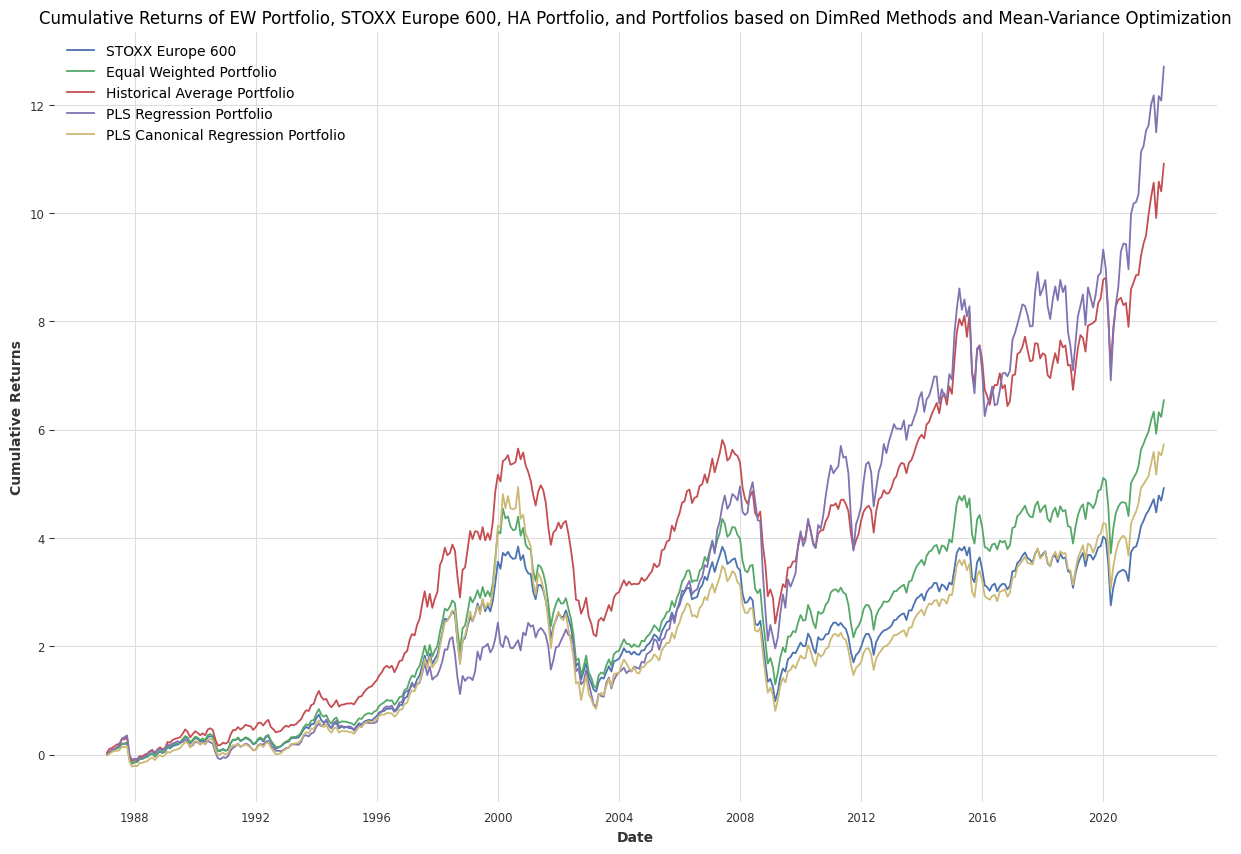

In [1049]:
# plot the cumulative returns of the equal weighted portfolio, the STOXX Europe 600, the historical average portfolio, the linear regression portfolio, the lasso regression portfolio, the elastic net regression portfolio, the bridge regression portfolio, the pls regression portfolio, the pls canonical regression portfolio and the cca regression portfolio
plt.figure(figsize=(15,10))
plt.plot(cum_returns['STOXX Europe 600'], label='STOXX Europe 600')
plt.plot(portfolio_returns['equal_weighted'], label='Equal Weighted Portfolio')
plt.plot(portfolio_returns['historical_average'], label='Historical Average Portfolio')
plt.plot(portfolio_returns['pls_regression'], label='PLS Regression Portfolio')
plt.plot(portfolio_returns['pls_canonical_regression'], label='PLS Canonical Regression Portfolio')
plt.legend(loc='upper left')
plt.title('Cumulative Returns of EW Portfolio, STOXX Europe 600, HA Portfolio, and Portfolios based on DimRed Methods and Mean-Variance Optimization')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show();

# Nonlinear ML Portfolios

## NOT WORKING: Random Forest Portfolio

In [1050]:
# get the random forest forecast from ML_forecasting_v2_Haas.ipynb  
%store -r random_forest_forecast

In [1051]:
# change the type of the random_forest_forecast to a pandas dataframe
random_forest_forecast = random_forest_forecast.pd_dataframe()

In [1052]:
# perform mean-variance optimization with the random forest forecast
mu_random_forest = expected_returns.mean_historical_return(random_forest_forecast)
S_random_forest = risk_models.sample_cov(random_forest_forecast)

In [1053]:
# optimize for maximal Sharpe ratio
#ef_random_forest = EfficientFrontier(mu_random_forest, S_random_forest)
#weights_random_forest = ef_random_forest.max_sharpe()

## Gradient Boosting Portfolio

In [1054]:
# get the gradient boosting forecast from ML_forecasting_v2_Haas.ipynb
%store -r gb_boosting_forecast

In [1055]:
# change the type of the gb_boosting_forecast to a pandas dataframe
gb_boosting_forecast = gb_boosting_forecast.pd_dataframe()

In [1056]:
# perform mean-variance optimization with the gradient boosting forecast
mu_gb_boosting = expected_returns.mean_historical_return(gb_boosting_forecast)
S_gb_boosting = risk_models.sample_cov(gb_boosting_forecast)

In [1057]:
# optimize for maximal Sharpe ratio
ef_gb_boosting = EfficientFrontier(mu_gb_boosting, S_gb_boosting)
weights_gb_boosting = ef_gb_boosting.max_sharpe()

In [1058]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_gb_boosting).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_gb_boosting.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.0000
STOXX Europe Banks             0.0000
STOXX Europe Financials        0.0147
STOXX Europe Auto & Parts      0.0000
STOXX Europe Insurance         0.0000
STOXX Europe Technology        0.3439
STOXX Europe Utilities         0.3672
STOXX Europe Chemicals         0.0605
STOXX Europe Basic Resource    0.2136
STOXX Europe Con & Mat         0.0000
STOXX Europe Health Care       0.0000
STOXX Europe Inds Gds & Svs    0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms          0.0000
dtype: float64
The sum of all weights is: 1.0


In [1059]:
# compute the returns of gradient boosting portfolio
gb_boosting_returns = (cum_returns * weights_gb_boosting).sum(axis=1)

In [1060]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['gb_boosting'] = gb_boosting_returns

# show the last 5 rows of portfolio_returns
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression,elastic_net_regression,bridge_regression,pls_regression,pls_canonical_regression,gb_boosting
time,,,,,,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879,21.147879,20.875656,12.176263,5.592267,6.333737
2021-10-01,5.926514,9.912039,15.535828,19.946396,19.946396,19.738131,11.493195,5.170919,5.721250
2021-11-01,6.322933,10.583310,16.720072,21.427089,21.427089,21.218571,12.161604,5.586395,6.202114
2021-12-01,6.237121,10.402550,16.281803,20.892168,20.892168,20.652174,12.080824,5.528173,6.207063
2022-01-01,6.544394,10.913366,17.049893,21.880713,21.880713,21.630943,12.705427,5.727818,6.423171


## NOT WORKING: Ada Boosting Portfolio

In [1061]:
# get the adaboost forecast from ML_forecasting_v2_Haas.ipynb
%store -r ada_boosting_forecast

In [1062]:
# change the type of the ada_boosting_forecast to a pandas dataframe
ada_boosting_forecast = ada_boosting_forecast.pd_dataframe()

In [1063]:
# perform mean-variance optimization with the ada boosting forecast
mu_ada_boosting = expected_returns.mean_historical_return(ada_boosting_forecast)
S_ada_boosting = risk_models.sample_cov(ada_boosting_forecast)

In [1064]:
# optimize for maximal Sharpe ratio
#ef_ada_boosting = EfficientFrontier(mu_ada_boosting, S_ada_boosting)
#weights_ada_boosting = ef_ada_boosting.max_sharpe()

## NOT WORKING: Extra Trees Portfolio

In [1065]:
# get the extra trees forecast from ML_forecasting_v2_Haas.ipynb
%store -r extra_tree_forecast

In [1066]:
# change the type of the extra_tree_forecast to a pandas dataframe
extra_tree_forecast = extra_tree_forecast.pd_dataframe()

In [1067]:
# perform mean-variance optimization with the extra tree forecast
mu_extra_tree = expected_returns.mean_historical_return(extra_tree_forecast)
S_extra_tree = risk_models.sample_cov(extra_tree_forecast)

/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/pypfopt/risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [1068]:
# optimize for maximal Sharpe ratio
#ef_extra_tree = EfficientFrontier(mu_extra_tree, S_extra_tree)
#weights_extra_tree = ef_extra_tree.max_sharpe()

## Support Vector Portfolio

In [1069]:
# get the svr forecast from ML_forecasting_v2_Haas.ipynb
%store -r svr_forecast

In [1070]:
# change the type of the svr_forecast to a pandas dataframe
svr_forecast = svr_forecast.pd_dataframe()

In [1071]:
# perform mean-variance optimization with the svr forecast
mu_svr = expected_returns.mean_historical_return(svr_forecast)
S_svr = risk_models.sample_cov(svr_forecast)

In [1072]:
# optimize for maximal Sharpe ratio
ef_svr = EfficientFrontier(mu_svr, S_svr)
weights_svr = ef_svr.max_sharpe()

In [1073]:
# print the weights in a table and round them to 4 decimals
print('The weights for each stock are:')
print(pd.Series(weights_svr).round(4))
# print the sum of all weights
print('The sum of all weights is: ' + str(round(sum(weights_svr.values()), 4)))

The weights for each stock are:
STOXX Europe 600               0.1873
STOXX Europe Banks             0.3213
STOXX Europe Financials        0.0000
STOXX Europe Auto & Parts      0.0000
STOXX Europe Insurance         0.1481
STOXX Europe Technology        0.0000
STOXX Europe Utilities         0.1316
STOXX Europe Chemicals         0.0000
STOXX Europe Basic Resource    0.1464
STOXX Europe Con & Mat         0.0000
STOXX Europe Health Care       0.0653
STOXX Europe Inds Gds & Svs    0.0000
STOXX Europe Media             0.0000
STOXX Europe Telecoms          0.0000
dtype: float64
The sum of all weights is: 1.0


In [1074]:
# compute the returns of svr portfolio
svr_returns = (cum_returns * weights_svr).sum(axis=1)

In [1075]:
# Add portfolio_returns as a new column in cum_returns
portfolio_returns['svr'] = svr_returns

# show the last 5 rows of portfolio_returns
portfolio_returns.tail()

component,equal_weighted,historical_average,linear_regression,lasso_regression,elastic_net_regression,bridge_regression,pls_regression,pls_canonical_regression,gb_boosting,svr
time,,,,,,,,,,
2021-09-01,6.334322,10.565259,16.437174,21.147879,21.147879,20.875656,12.176263,5.592267,6.333737,4.492393
2021-10-01,5.926514,9.912039,15.535828,19.946396,19.946396,19.738131,11.493195,5.170919,5.721250,4.189416
2021-11-01,6.322933,10.583310,16.720072,21.427089,21.427089,21.218571,12.161604,5.586395,6.202114,4.519690
2021-12-01,6.237121,10.402550,16.281803,20.892168,20.892168,20.652174,12.080824,5.528173,6.207063,4.417567
2022-01-01,6.544394,10.913366,17.049893,21.880713,21.880713,21.630943,12.705427,5.727818,6.423171,4.671592


## Plotting of all portfolios against the benchmarks

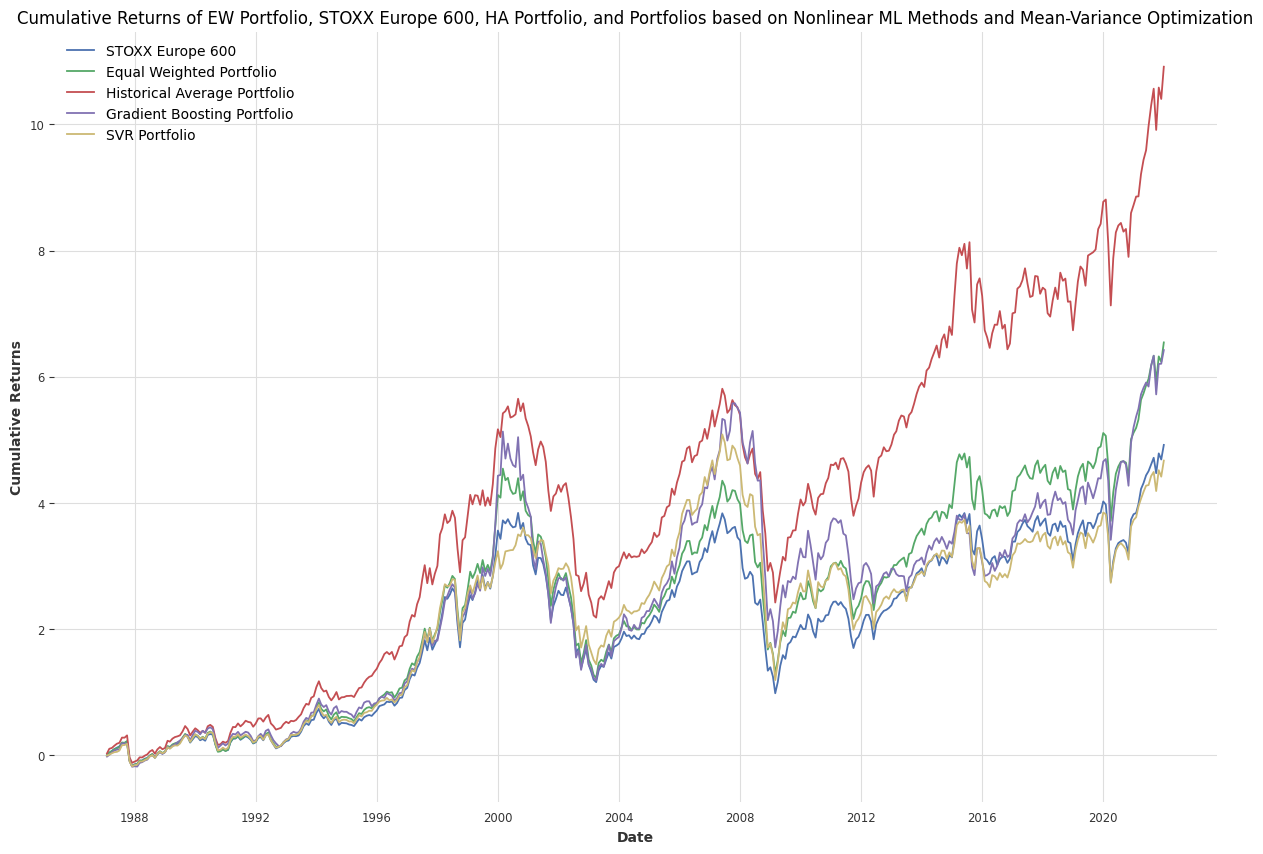

In [1076]:
# plot the cumulative returns of the equal weighted portfolio, the STOXX Europe 600, the historical average portfolio, the linear regression portfolio, the lasso regression portfolio, the elastic net regression portfolio, the bridge regression portfolio, the pls regression portfolio, the pls canonical regression portfolio, the cca regression portfolio, the random forest portfolio, the gradient boosting portfolio, the ada boosting portfolio, the extra tree portfolio and the svr portfolio
plt.figure(figsize=(15,10))
plt.plot(cum_returns['STOXX Europe 600'], label='STOXX Europe 600')
plt.plot(portfolio_returns['equal_weighted'], label='Equal Weighted Portfolio')
plt.plot(portfolio_returns['historical_average'], label='Historical Average Portfolio')
#plt.plot(portfolio_returns['random_forest'], label='Random Forest Portfolio')
#plt.plot(portfolio_returns['extra_tree'], label='Extra Tree Portfolio')
plt.plot(portfolio_returns['gb_boosting'], label='Gradient Boosting Portfolio')
#plt.plot(portfolio_returns['ada_boosting'], label='Ada Boosting Portfolio')
plt.plot(portfolio_returns['svr'], label='SVR Portfolio')
plt.legend(loc='upper left')
plt.title('Cumulative Returns of EW Portfolio, STOXX Europe 600, HA Portfolio, and Portfolios based on Nonlinear ML Methods and Mean-Variance Optimization')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show();